# Титаник


PassengerId,
Pclass -класс (всего 3),
Name,
Sex,
Age,
SibSp - число братьев/сестер/супруга,
Parch - на борту родители/дети,
Ticket - билет,
Fare - стоимость проезда (тариф),
Cabin - каюта,
Embarked - порт посдки (C = Шербур, Q = Квинстаун, S = Саутгемптон)

In [10]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as ms


In [12]:
sur = pd.read_csv(r"C:\Users\romas\Desktop\titanic\gender_submission.csv") 
test = pd.read_csv(r"C:\Users\romas\Desktop\titanic\test.csv") 
train = pd.read_csv(r"C:\Users\romas\Desktop\titanic\train.csv")

In [13]:
#print(sur)
#print(test)
print(train)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

в таблице sur - содержаться выжившие и их айди
в таблице train - вся инфо о пассжирах кроме инфы о выживших
в таблице test - полная инфа

<Axes: >

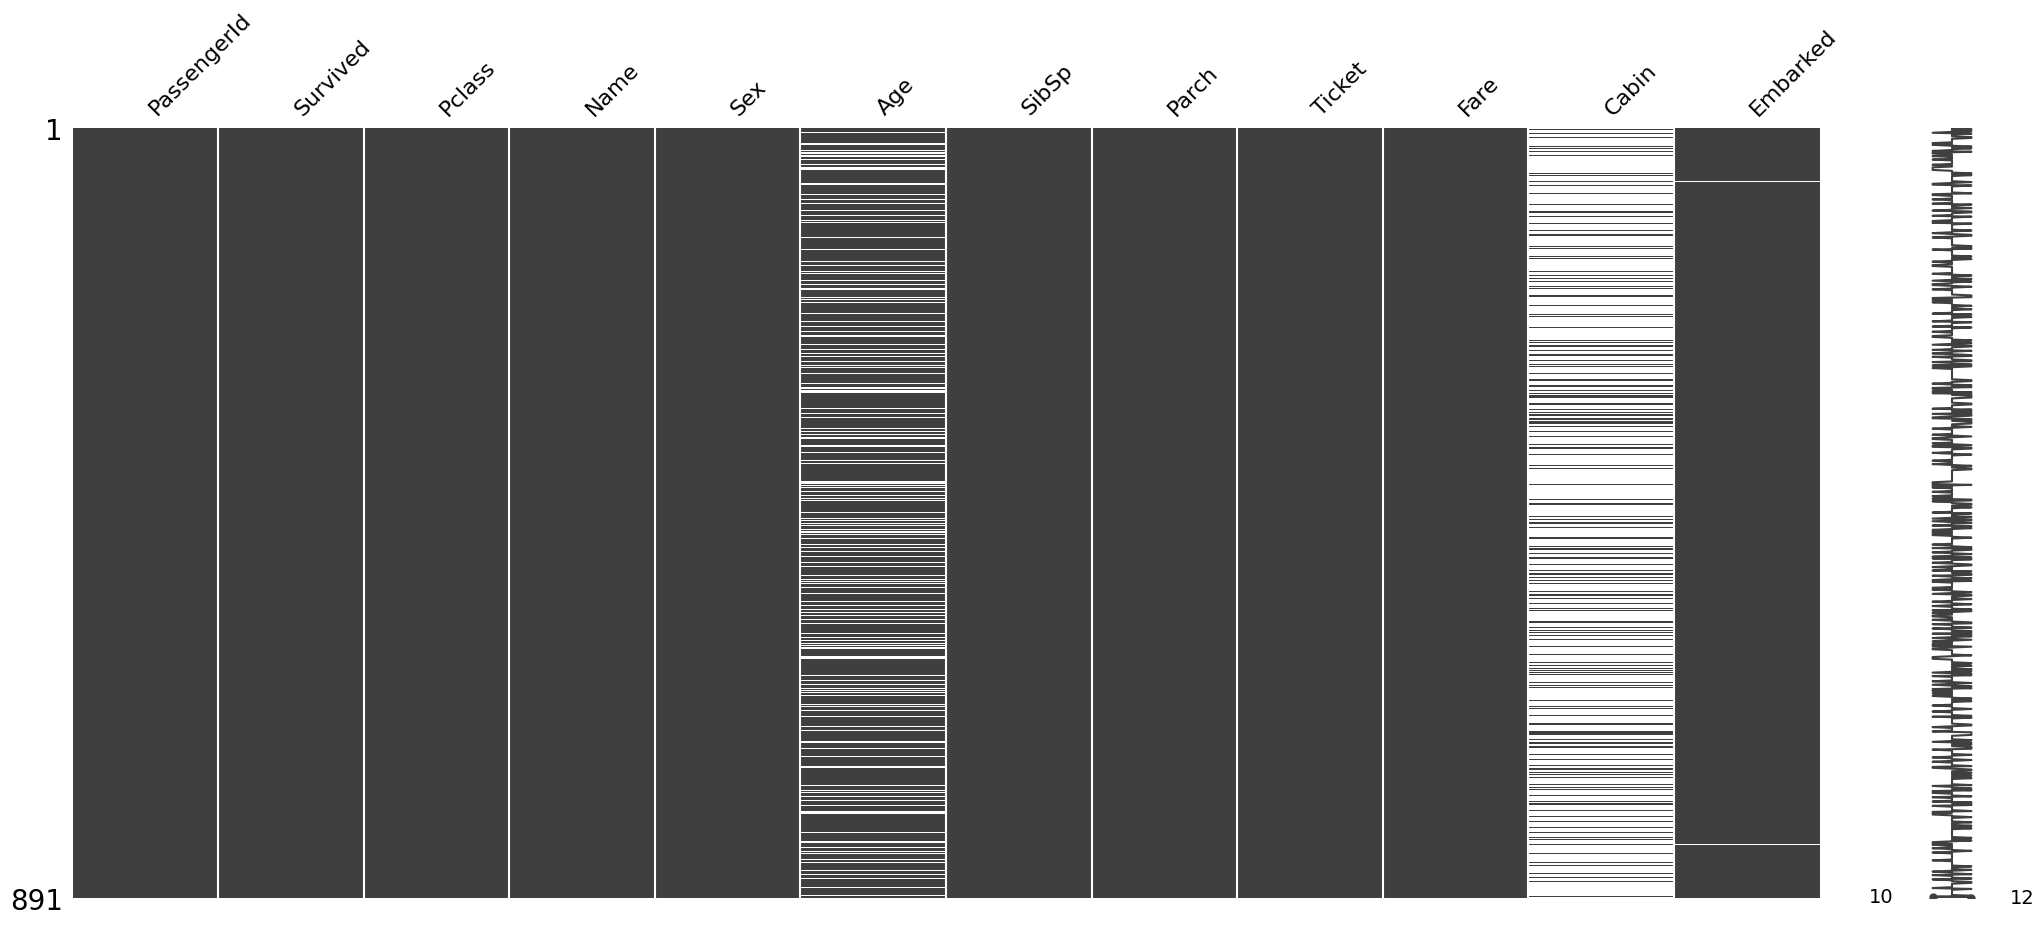

In [14]:
ms.matrix(train)

<Axes: >

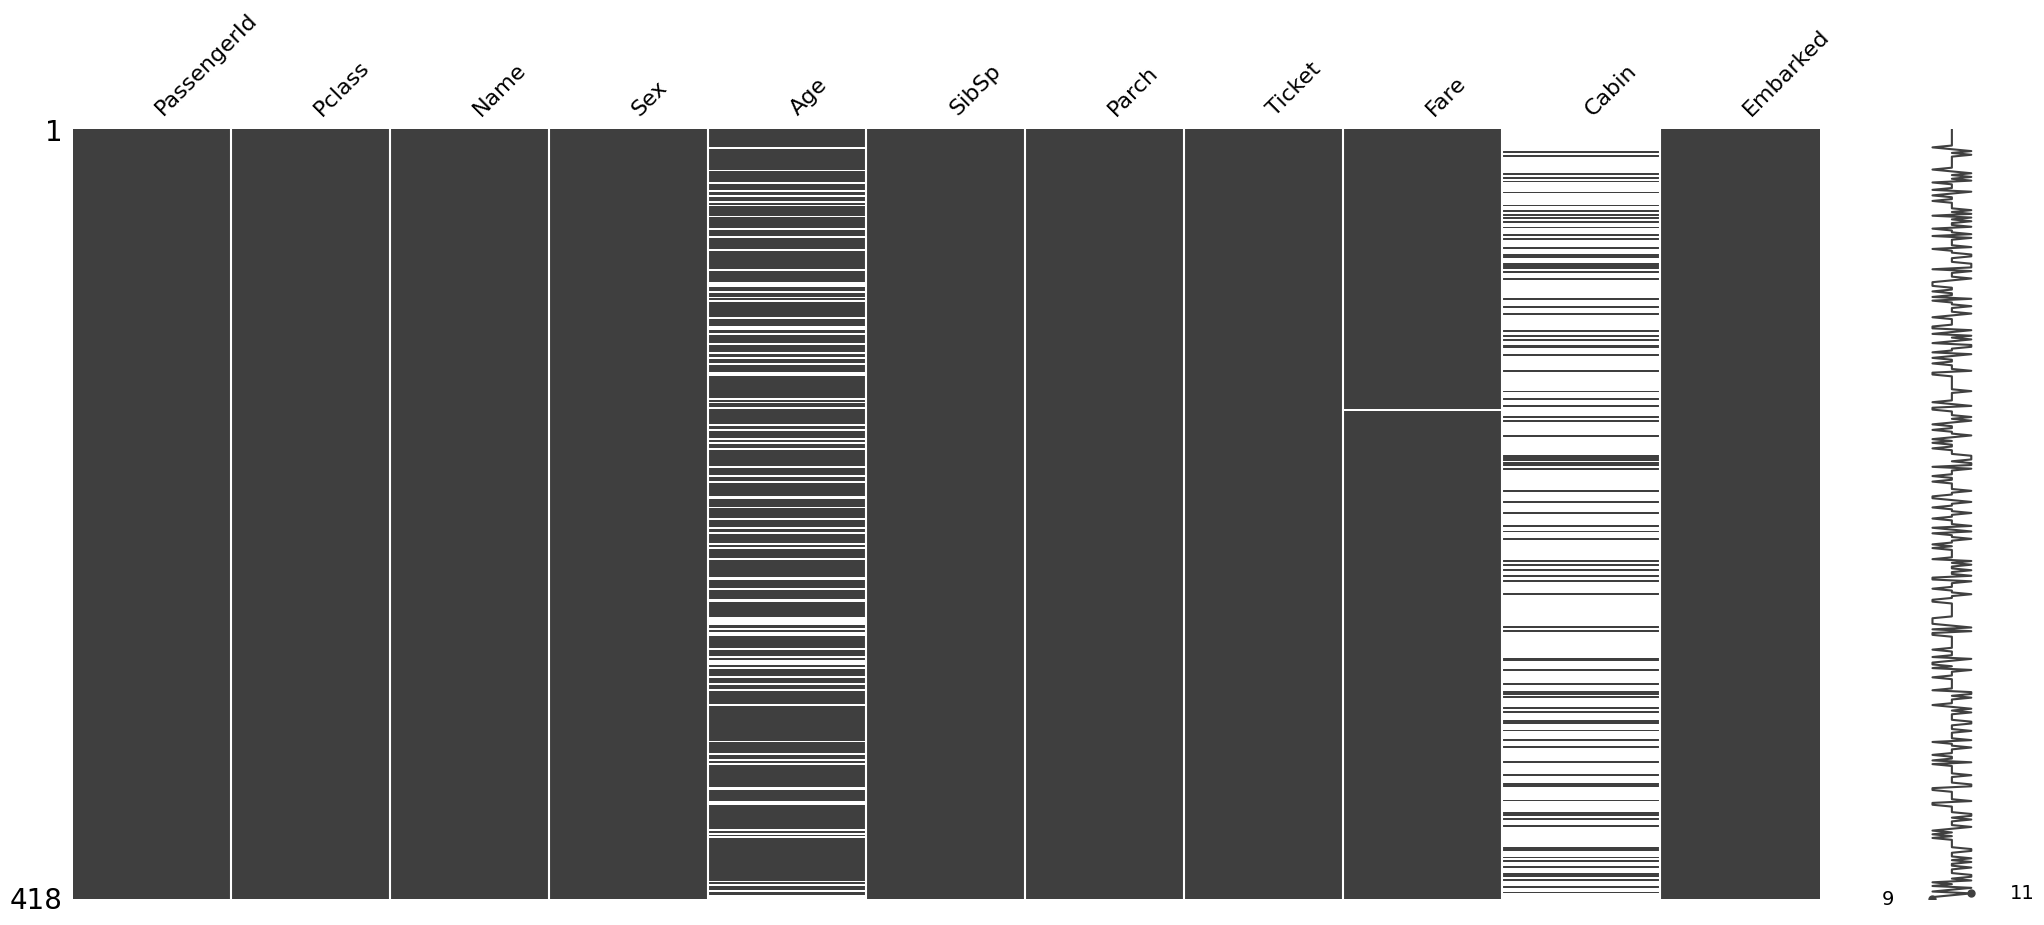

In [15]:
ms.matrix(test)

<Axes: >

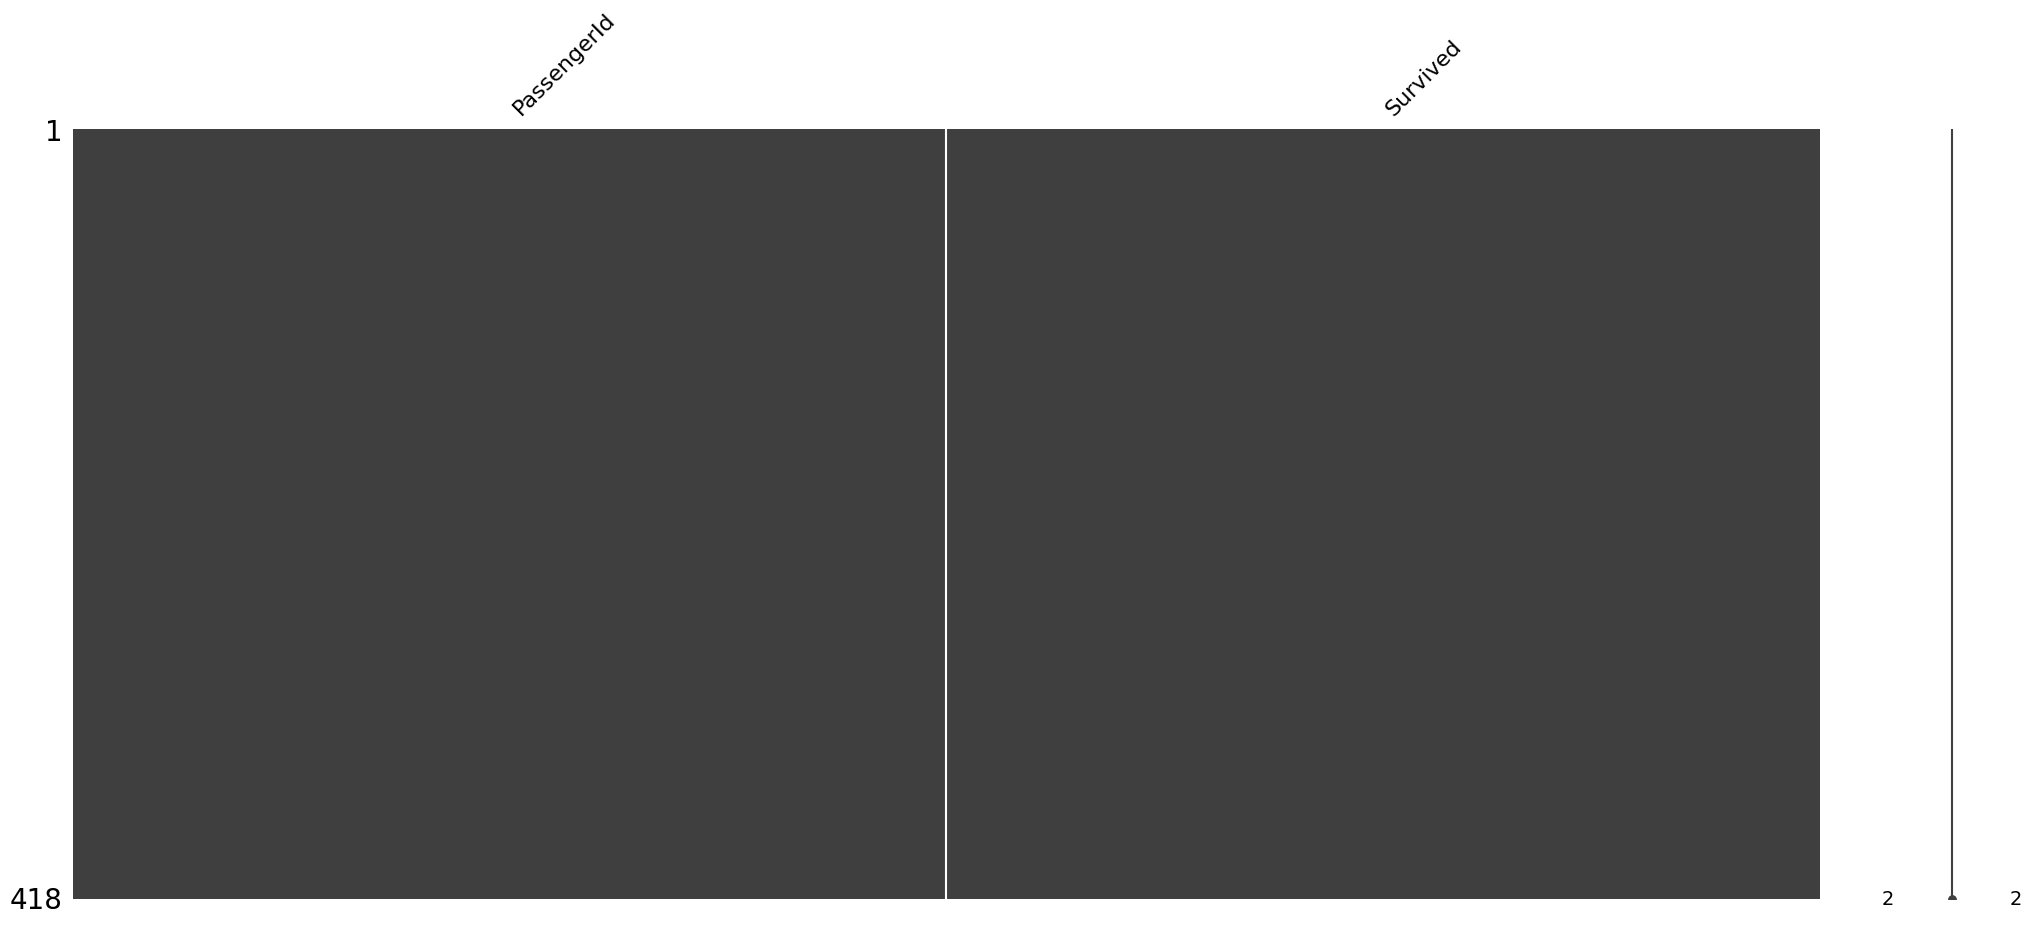

In [16]:
ms.matrix(sur) # full info

In [17]:
#merg all in table
sur = pd.concat([train, test.merge(sur, on= 'PassengerId', how = 'right')], ignore_index =True)
#print(sur)

In [18]:
from IPython.display import display

display(sur)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [19]:
sur.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [20]:
sur.groupby('Sex')['PassengerId'].count()

Sex
female    466
male      843
Name: PassengerId, dtype: int64

Sex
female    Axes(0.125,0.11;0.775x0.77)
male      Axes(0.125,0.11;0.775x0.77)
Name: Age, dtype: object

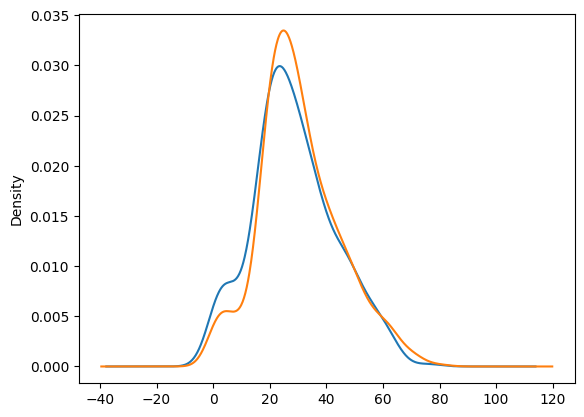

In [21]:
sur.groupby('Sex')['Age'].plot(kind='kde')

<Axes: >

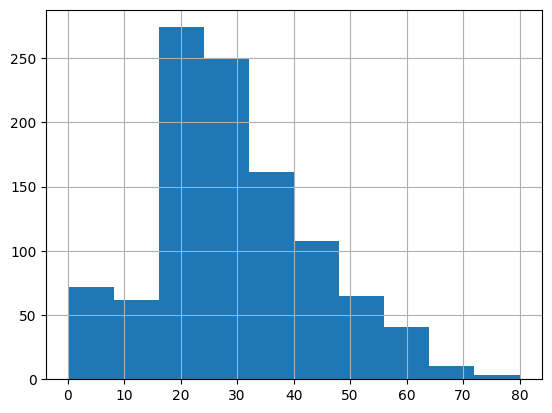

In [22]:
sur['Age'].hist()

<Axes: >

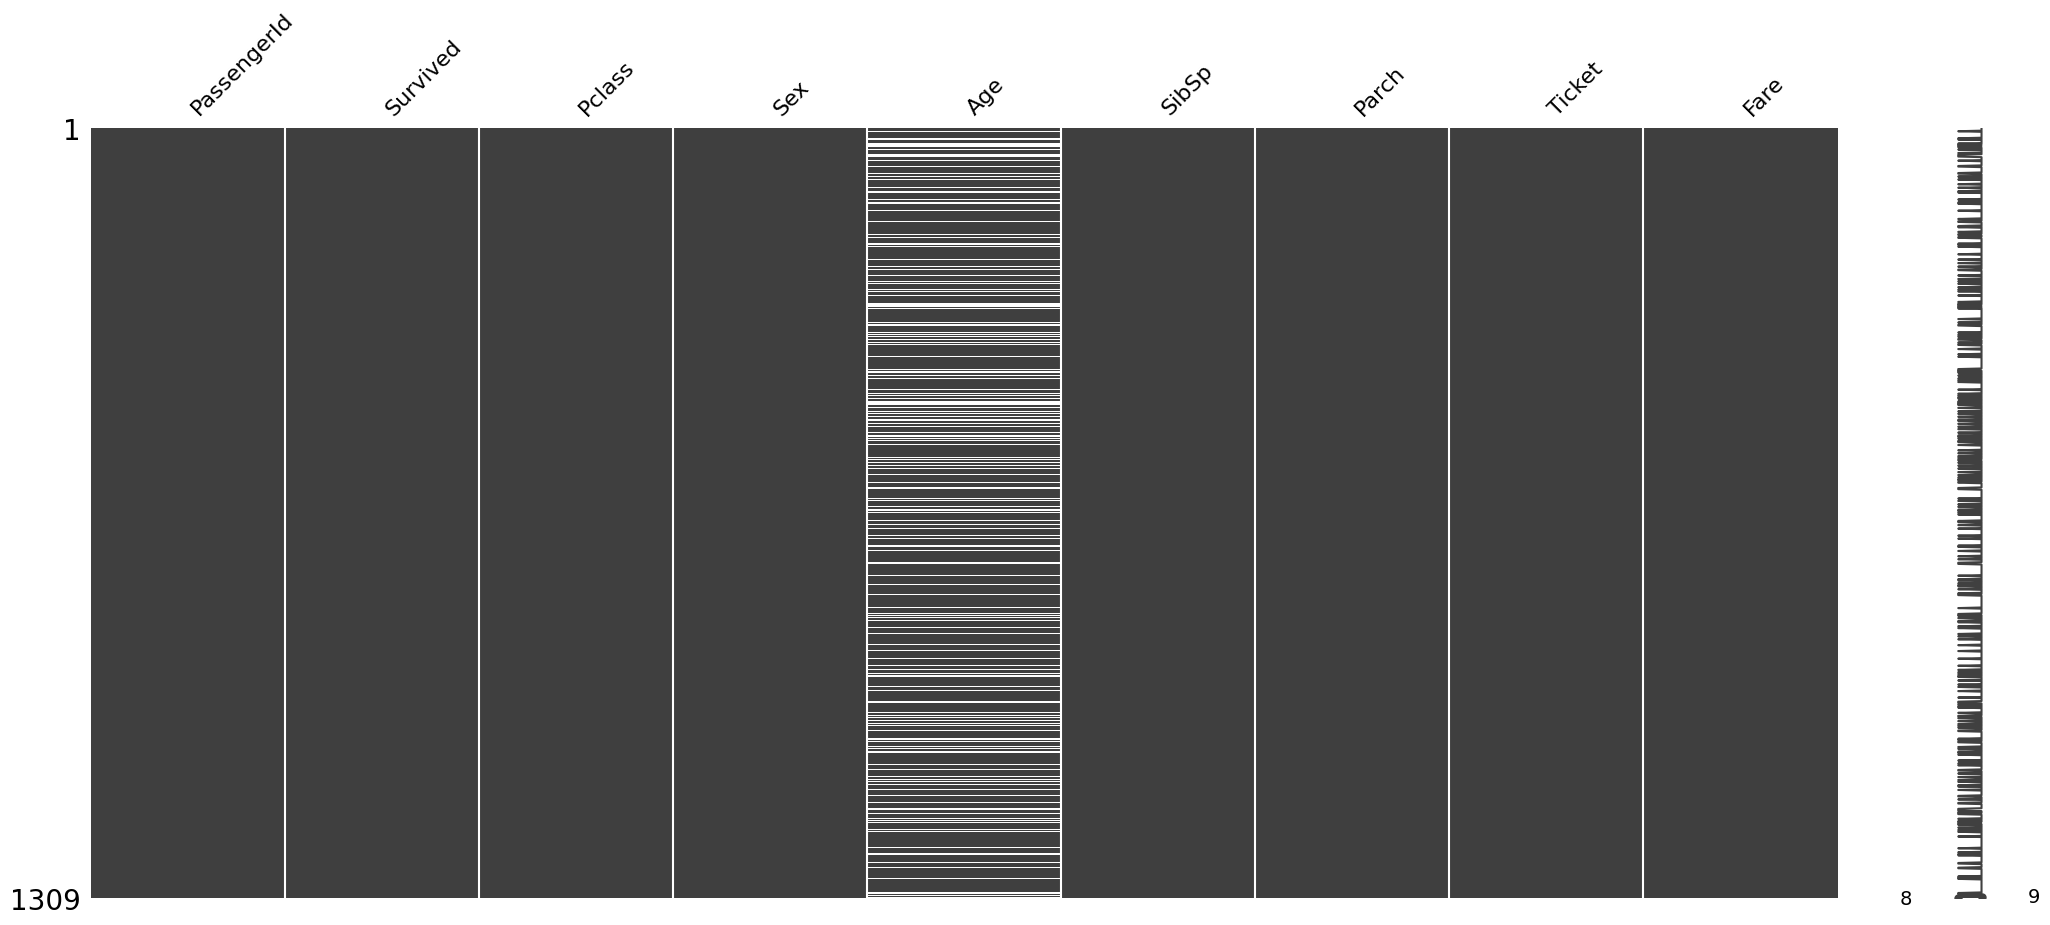

In [23]:
# delete info not make sense
sur = sur.drop(labels=['Name','Cabin', 'Embarked'], axis=1)
ms.matrix(sur)

In [24]:
sur.groupby('Pclass')['PassengerId'].count()

Pclass
1    323
2    277
3    709
Name: PassengerId, dtype: int64

Pclass
1    Axes(0.125,0.11;0.775x0.77)
2    Axes(0.125,0.11;0.775x0.77)
3    Axes(0.125,0.11;0.775x0.77)
Name: Sex, dtype: object

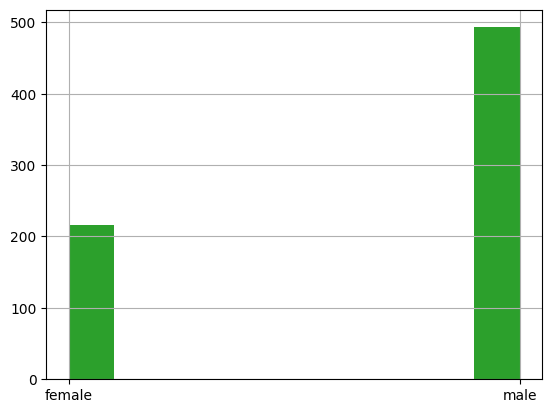

In [25]:
sur.groupby('Pclass')['Sex'].hist()

In [26]:
sur.groupby('Pclass')['Sex'].inline()

AttributeError: 'SeriesGroupBy' object has no attribute 'inline'

In [27]:
sur.groupby('Pclass')['PassengerId'].count()

Pclass
1    323
2    277
3    709
Name: PassengerId, dtype: int64

In [28]:
sur.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [29]:
one_sur = list(sur[sur['Pclass'] == 1]['Survived']).count(1)
two_sur = list(sur[sur['Pclass'] == 2]['Survived']).count(1)
three_sur = list(sur[sur['Pclass'] == 3]['Survived']).count(1)
print(one_sur) #survived in 1 class
print(two_sur) #survived in 2 class
print(three_sur) #survived in 3 class

186
117
191


##### Выжиываемоесть взависимости от класса

In [30]:
proc_one = (100*one_sur)/323
proc_two = (100*two_sur)/277
proc_three = (100*three_sur)/709
print(proc_one)
print(proc_two)
print(proc_three)

57.585139318885446
42.238267148014444
26.939351198871652


Axes(0.125,0.11;0.775x0.77)


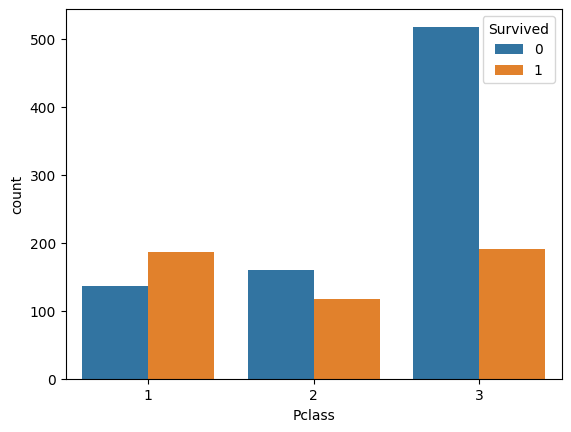

In [31]:
import seaborn as sns
print(sns.countplot(x="Pclass", hue="Survived", data=sur))

Выводы выживаемости:
1 класс - выжили больше половины
2 класс - выжило чуть меньше половины
3 класс - выжила примерно 1/4

##### Выжиываемоесть взависимости от пола

In [32]:
male = list(sur['Sex']).count('male')
female = list(sur['Sex']).count('female')
male_sur = list(sur[sur['Sex'] == 'male']['Survived']).count(1)
female_sur = list(sur[sur['Sex'] == 'female']['Survived']).count(1)
print(male_sur)
print(female_sur)

109
385


In [33]:
proс_male = (100*male_sur)/male
proc_female  = (100*female_sur)/female
print(proс_male)
print(proc_female)

12.930011862396205
82.61802575107296


Axes(0.125,0.11;0.775x0.77)


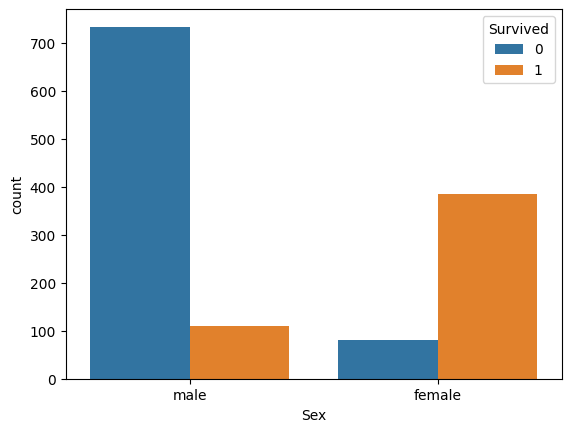

In [34]:
print(sns.countplot(x="Sex", hue="Survived", data=sur))

выводы выживаемости:
женщины - выжило 4/5
мужчины - выжило 1/10

##### Выжиываемоесть взависимости от возраста

<Axes: >

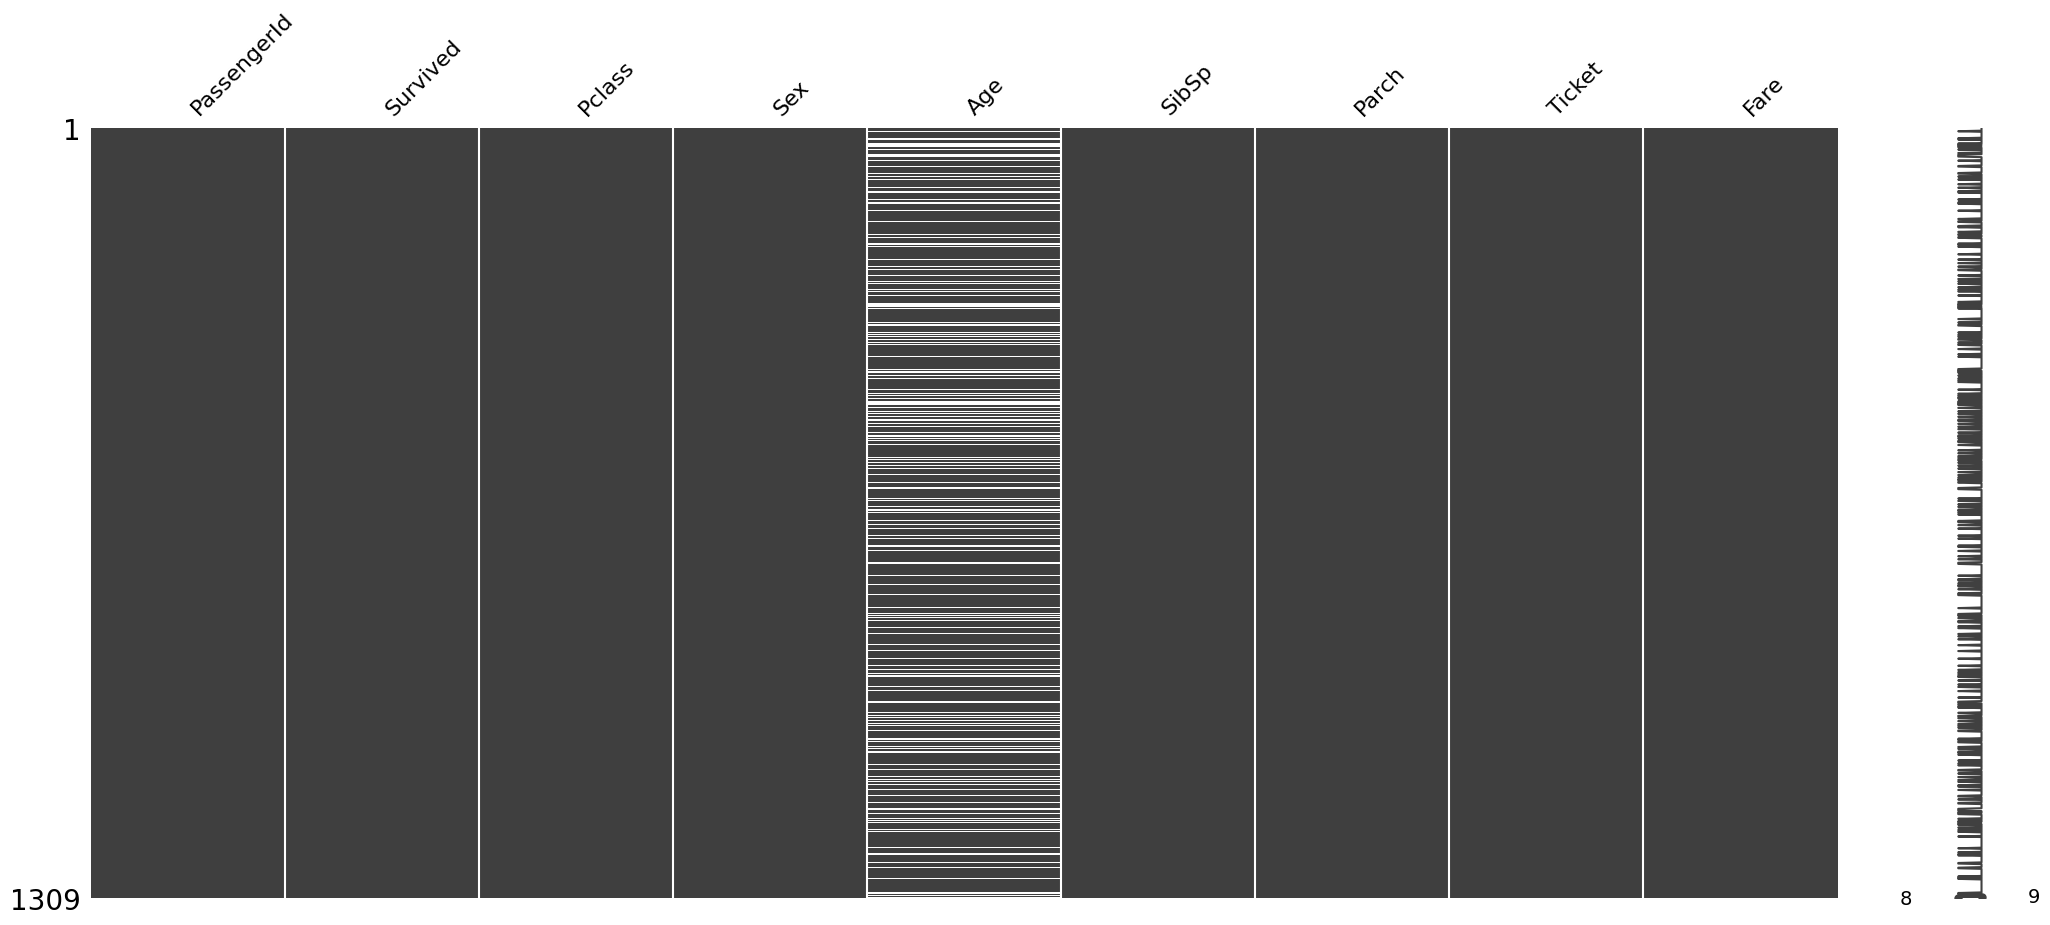

In [37]:
ms.matrix(sur)

In [38]:
#пустыми остались только значения возраста, заполним их медианным значением по их классу

# скопируем датафрейм
median_imputer_bins = sur.copy()

# сгруппируем пассажиров по полу и классу каюты
Age_bins = median_imputer_bins.groupby(['Sex', 'Pclass'])
 
# найдем медианный возраст с учетом получившихся групп
Age_bins.Age.median()

# объект SeriesGroupBy находится в переменной Age_bins.Age,
# применим к нему lambda-функцию через метод .apply()
median_imputer_bins.Age = Age_bins.Age.apply(lambda x: x.fillna(x.median()))

In [39]:
# проверим пропуски в столбце Age
median_imputer_bins.Age.isna().sum()

0

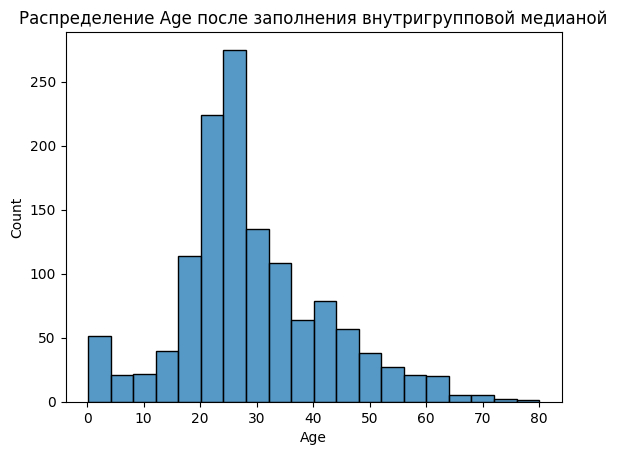

In [40]:
sns.histplot(median_imputer_bins['Age'], bins = 20)
plt.title('Распределение Age после заполнения внутригрупповой медианой');

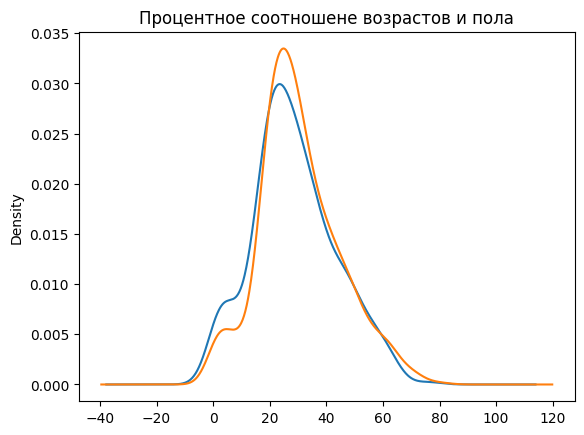

In [41]:
sur.groupby('Sex')['Age'].plot(kind='kde')
plt.title('Процентное соотношене возрастов и пола');

C:\Users\romas\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


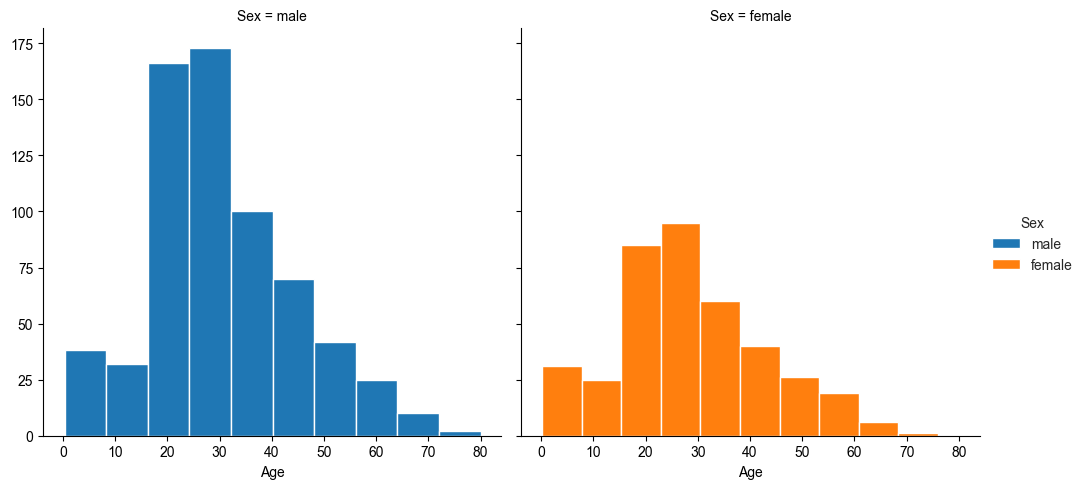

In [42]:
g = sns.FacetGrid(sur, col = "Sex",  hue = 'Sex', size = 5)
sns.set_style("whitegrid")
g.map(plt.hist, "Age").add_legend()
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

C:\Users\romas\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\romas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\romas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


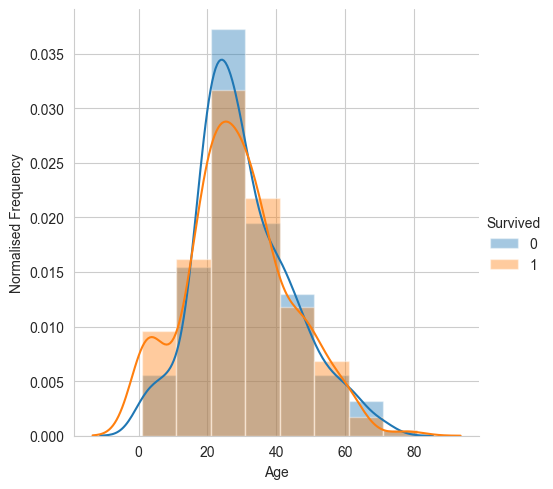

In [43]:
b = list(range(1,101,10))
sns.set_style("whitegrid")
sns.FacetGrid(sur, hue = 'Survived', size = 5).map(sns.distplot, 'Age', bins = b).add_legend()
plt.xlabel('Age')
plt.ylabel('Normalised Frequency')
plt.show()

In [44]:
hist, bin_edges = np.histogram(sur['Age'], bins=b)
print("Histogram values =", hist, "\nBin edges =", bin_edges)
print('\nTotal Male Passengers')
hist1, bin_edges1 = np.histogram(sur['Age'][sur['Sex']=='male'], bins=b)
print("Histogram values =", hist1, "\nBin edges =", bin_edges1)
print('\nTotal Female Passengers')
hist2, bin_edges2 = np.histogram(sur['Age'][sur['Sex']=='female'], bins=b)
print("Histogram values =", hist2, "\nBin edges =", bin_edges2)
print('\nTotal Male Passengers survived')
hist3, bin_edges3 = np.histogram(sur['Age'][sur['Sex']=='male'][sur['Survived']==1], bins=b)
print("Histogram values =", hist3, "\nBin edges =", bin_edges3)
print('\nTotal Female Passengers survived')
hist4, bin_edges4 = np.histogram(sur['Age'][sur['Sex']=='female'][sur['Survived']==1], bins=b)
print("Histogram values =", hist4, "\nBin edges =", bin_edges4)

Histogram values = [ 74 163 362 211 129  63  27   5   0] 
Bin edges = [ 1 11 21 31 41 51 61 71 81 91]

Total Male Passengers
Histogram values = [ 37  95 235 137  83  38  21   4   0] 
Bin edges = [ 1 11 21 31 41 51 61 71 81 91]

Total Female Passengers
Histogram values = [ 37  68 127  74  46  25   6   1   0] 
Bin edges = [ 1 11 21 31 41 51 61 71 81 91]

Total Male Passengers survived
Histogram values = [14 10 23 23 12  4  1  1  0] 
Bin edges = [ 1 11 21 31 41 51 61 71 81 91]

Total Female Passengers survived
Histogram values = [ 25  56 106  66  36  24   6   1   0] 
Bin edges = [ 1 11 21 31 41 51 61 71 81 91]


In [45]:
for i in range(len(hist)):
    print("{} пассажиры между {} and {} годами -- {} мужчины из {} --- {} женщины из {} \n"\
          .format(hist[i], round(bin_edges[i], 2), round(bin_edges[i+1], 2), hist3[i], hist1[i], hist4[i], hist2[i]))

74 пассажиры между 1 and 11 годами -- 14 мужчины из 37 --- 25 женщины из 37 

163 пассажиры между 11 and 21 годами -- 10 мужчины из 95 --- 56 женщины из 68 

362 пассажиры между 21 and 31 годами -- 23 мужчины из 235 --- 106 женщины из 127 

211 пассажиры между 31 and 41 годами -- 23 мужчины из 137 --- 66 женщины из 74 

129 пассажиры между 41 and 51 годами -- 12 мужчины из 83 --- 36 женщины из 46 

63 пассажиры между 51 and 61 годами -- 4 мужчины из 38 --- 24 женщины из 25 

27 пассажиры между 61 and 71 годами -- 1 мужчины из 21 --- 6 женщины из 6 

5 пассажиры между 71 and 81 годами -- 1 мужчины из 4 --- 1 женщины из 1 

0 пассажиры между 81 and 91 годами -- 0 мужчины из 0 --- 0 женщины из 0 



вывод выживаемости по возрвасту:
от 1 до 11 - 0,38м и 0,73ж
от 11 до 21 - 0.1м и 0,82ж
от 21 до 31 - 0.098м и 0,83ж
от 31 до 41 - 0,17м и 0,89ж
от 41 до 51 - 0,14м и 0,78ж
от 51 до 61 - 0,11м и 0,96ж
от 61 до 71 - 0,05м и 1ж
от 71 до 81 - 0,25м и 1ж

в основном выжили женщины

##### Выжиываемоесть взависимости от количества членов семьи

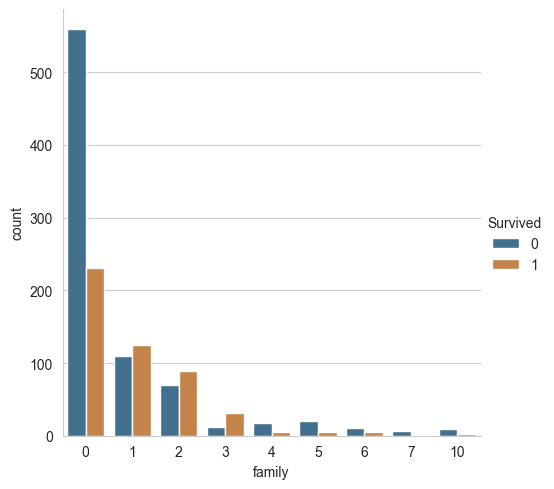

In [46]:
data = sur.copy()
data = data.drop('Age', axis=1)
data['family'] = data['Parch'] + data['SibSp']

sns.catplot(data = data,hue = 'Survived', x = 'family', kind='count', saturation=0.5)

Выводы выживаемости:
нет родственников - выживаемость меньше половины
1 родственник - выживаемоть 1/2
2 родственника - выживаемость 1/2
3 родственника - выживаемость 3/4
4-7 родственника - выживаемоть очень низкая

### Предсказание выживаемости

In [68]:
from sklearn.ensemble import RandomForestClassifier

y = train["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train[features])
X_test = pd.get_dummies(test[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
